In [1]:
import tools
import numpy as np
import pickle
import matplotlib
import dunn
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import SpectralClustering
from s_dbw import S_Dbw
from collections import Counter
from easydl import clear_output
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
global drugPairFile
drugPairFile = 'drug_pairs_test.csv'
targList, cellLineInfoDf, AUCDf, ICDf = tools.readCSV('cell_line_info.csv', 'IC50.csv', 'AUC.csv', drugPairFile)
global methods
# methods = ['KMB', 'RWB', 'SOM', 'UNMZB', 'SYMB']
methods = ['KMB', 'RWB', 'UNMZB', 'SYMB']
# methods = ['UNMZB']

tarNameList = list()
for xx in targList:
    tarNameList.append('_'.join(xx))
    

global numCellLines
numCellLines = ['329', '363', '365', '366', '366', '367', '368', '654', '762', '820', '949']

numCellLines = ['2']
for ii,xx in enumerate(numCellLines):
    numCellLines[ii] = tarNameList[ii] + ' (' + xx + ')'

print(numCellLines)
    
global numSampelsData
numSampelsData = 900


# methods = ['KMB','UNMZB']


[easydl] tensorflow not available!
['AZ628_CI-1040 (2)']


In [2]:
def runClustering(algorithm, KMB_It = 4):
    import numpy as np
    import datetime
    import time
    import sys
    sys.path.append('/home/henry/code/KMBased/')
    sys.path.append('/home/henry/code/RWBased/')
    sys.path.append('/home/henry/code/SOM/')
#     sys.path.append('/home/henry/code/AP/')
    sys.path.append('/home/henry/code/SYMBased/')
    sys.path.append('/home/henry/code/UNMZBased/')
#     sys.path.append('/home/henry/code/KMeans/')

    import tools

    import KMBased
    import RWBased
    import SOM_AdjCos
#     import AP
    import SYMBased
    import UNMZBased
#     import KMeans
    
    global numKMB_It
    numKMB_It = KMB_It
    
    targList, cellLineInfoDf, AUCDf, ICDf = tools.readCSV('cell_line_info.csv', 'IC50.csv', 'AUC.csv', drugPairFile)
    
#     global cellLineInfoDf
#     global AUCDf
#     global ICDf
    
#     cellLineInfoDf = cellLineInfoDfX
#     AUCDf = AUCDfX
#     ICDf = ICDfX

    global minV
#     minV = [40,35,40,35,30,45]
# [40,35,40,35]
    minV = [40]
    
    global ssTh
#     ssTh = [0.25, 0.10, 0.15, 0.22, 0.20, 0.20]
# , 0.10, 0.15, 0.22
    ssTh = [0.25]
    global minSZ
#     minSZ = [20, 15, 20, 12, 14, 10]
#, 15, 20, 12
    minSZ = [20]

    
    for ii, curTarg in enumerate(targList):
        
        print('*'*20,'Current Target:', curTarg,'*'*20)
        curSensValList, curCellLineList, curTissueList = tools.getCorrespondenceInfo(curTarg, cellLineInfoDf, AUCDf, ICDf)
        
        # SOM parameters
        length = curSensValList.shape[0]
#         global somSize
        somSize = [int(np.sqrt(length*3/4)), int(np.sqrt(length*2/3))]
        
#         global somLR
        somLR = [0.50, 0.50]
        
#         global somLRTh
        somLRTh = [0.04, 0.03]
        
#         global somMaxIT
        somMaxIT = [60, 70]
    
        global somRun
        somRun = len(somLR)
        
        startTime = datetime.datetime.now()
        
        if algorithm == 'SOM':
            for jj in range(len(somSize)):
                SOM_AdjCos.main(curTarg, cellLineInfoDf, AUCDf, ICDf, (somSize[jj], somSize[jj]), somLR[jj], somLRTh[jj], somMaxIT[jj])
            
        elif algorithm == 'RWB':
            for jj in range(len(minV)):
                
                RWBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
            
        elif algorithm == 'KMB':
            for numRun in range(KMB_It):
                print(str(numRun+1)+'th Run KMB')
                KMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, numRun)
                
        elif algorithm == 'UNMZB':
            for jj in range(len(minV)):
                UNMZBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
            
#         elif algorithm == 'AP':
#             AP.main(curTarg, curSensValList, maxIter=AP_maxIt, damping=AP_damp, verbose_boolean=AP_Ver)
        
        elif algorithm == 'SYMB':
            for jj in range(len(minV)):
                SYMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
        
        elif algorithm == 'all':
            
            

#             SOM_size = int(np.sqrt(curSensValList.shape[0]*3/4))
#             SOM_AdjCos.main(curTarg, cellLineInfoDf, AUCDf, ICDf, (SOM_size, SOM_size), SOM_lr, SOM_lrTh, SOM_maxIt)
            
            
            for jj in range(len(minV)):
                print('-'*10, str(jj+1) + 'th run', '-'*10)
                # RW first, make sure the adjMatrix File is saved
                SYMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
                RWBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
#                 SYMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
                UNMZBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, minV[jj], ssTh[jj], minSZ[jj])
                
                
#             for kk in range(len(somSize)):
#                 print('-'*10, str(kk+1) + 'th run', '-'*10)
#                 somTime0 = time.time()
#                 SOM_AdjCos.main(curTarg, cellLineInfoDf, AUCDf, ICDf, (somSize[kk], somSize[kk]), somLR[kk], somLRTh[kk], somMaxIT[kk])
#                 print('SOM Time:', time.time()-somTime0)
                
        
            for numRun in range(KMB_It):
                print(str(numRun+1)+'th Run KMB')
                KMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, numRun)
            
            endTime = datetime.datetime.now()
            print('-'*20)
        


        elif algorithm == 'N':
            pass
#         elif algorithm == 'KMeans':
#             KMeans.main(curTarg, curSensValList, KMeansMaxC)
        
#         elif algotithm == 'All':
#             SOM_size = int(np.sqrt(curSensValList.shape[0]*3/4))
#             SOM_AdjCos.main(curTarg, cellLineInfoDf, AUCDf, ICDf, (SOM_size, SOM_size), SOM_lr, SOM_lrTh, SOM_maxIt)
#             KMeans.main(curTarg, curSensValList, KMeansMaxC)
#             RWBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf)
            
#             for numRun in range(KMB_It):
#                 print(str(numRun+1)+'th Run KMB')
#                 KMBased.main(ii, curTarg, cellLineInfoDf, AUCDf, ICDf, numRun)
                
#             AP.main(curTarg, curSensValList, maxIter=AP_maxIt, damping=AP_damp, verbose_boolean=AP_Ver)
#         print('Total Running Time:', endTime - startTime)
    return targList
            

In [3]:
# for ii in range(2):
#     if ii == 0:
# drugPairFile = 'drug_pairs_900.csv'
allTargList = runClustering('all')
#     if ii == 1:
# #         clear_output()
#         drugPairFile = 'drug_pairs_900.csv'
#         allTargList = runClustering('n')

******************** Current Target: ['AZ628' 'CI-1040'] ********************
---------- 1th run ----------
SYMB Start
Cell Lines Number 367
MakeCellLine Time: 26.591189861297607
Cut Time:  27.524789333343506
Number of clusters:  11
Silhouette= 0.28862116452988884
Cal-Har= 135.00419476698275
Davies-Bouldin= 1.3067950463862577
11
Slow Dunn= 0.002839877554559288
PBM= 0.45140954289672885
SDB_W= 0.39293420058077655
RMSSTD= 0.24587858743931132
Running Time: 54.12629795074463
SYMB End

RW Start
Cell Lines Number 367
MakeCellLine Time: 25.289073944091797
Cut Time:  26.896190643310547
Total Running Time: 52.19677376747131
Number of clusters:  11
Silhouette= 0.2777577117759149
Cal-Har= 133.7850101256136
Davies-Bouldin= 1.2647823569911094
11
Slow Dunn= 0.004786435105731659
PBM= 0.45565273370084697
SDB_W= 0.40389383896238107
RMSSTD= 0.24676188258072082

UNMZ Start
Cell Lines Number 367
MakeCellLine Time: 25.8739492893219
Cut Time:  32.67199397087097
Number of clusters:  5
Silhouette= 0.3118330928

In [7]:
def prepareEnsembleData(targList):
    import pickle
    import numpy as np
    from sklearn.metrics import davies_bouldin_score as dbScore
    from sklearn.metrics import calinski_harabasz_score as chScore
    
    
    esDataList = list()
    esLabelList = list()

    
    SC_List = list()
    DUNN_List = list()
    PBM_List = list()
    SDBW_List = list()
    RMSSTD_List = list()
    
    targNameList = list()
    
    
    kmbDict={}
    symDict = {}
    rwbDict = {}
    unmzDict = {}
    somDict ={}
    
    for ii, curTarg in enumerate(targList):
        fileName = ('_').join(curTarg)
        targNameList.append(fileName)
        print('Cur Target:', curTarg)
        
        esDataList.append([])
        esLabelList.append([])
        
        SC_List.append([])
        DUNN_List.append([])
        PBM_List.append([])
        SDBW_List.append([])
        RMSSTD_List.append([])
        

        curSensValList, curCellLineList, curTissueList = tools.getCorrespondenceInfo(curTarg, cellLineInfoDf, AUCDf, ICDf)
        
        # SOM parameters
        length = curSensValList.shape[0]
        
        somSize = [int(np.sqrt(length*3/4)), int(np.sqrt(length*2/3))]
#         somSize = [int(np.sqrt(length*3/4)), int(np.sqrt(length*2/3))]
        somLR = [0.50, 0.50]
        somLRTh = [0.04, 0.03]
        somMaxIT = [60, 70]
        

        
        
        countNumClusters = 0
        
        
        for mm in methods:
            if mm == 'KMB':
                
                for jj in range(numKMB_It):
                    f0 = open(mm + '_DataAndLabel/' + str(jj) + '/' + fileName, 'rb')
                    sensValArray = pickle.load(f0)
                    labelArray = pickle.load(f0)
                    
#                     esDataDict[(fileName,mm,jj)] = sensValArray
#                     esLabelDict[(fileName,mm,jj)] = labelArray
                    
                    esDataList[ii].append(sensValArray)
                    esLabelList[ii].append(labelArray)
                    f0.close()
                    
                    f1 = open(mm + '_SScore/' + str(jj) + '/' + fileName, 'rb')
                    
                    sil = pickle.load(f1)
                    
                    SC_List[ii].append((countNumClusters, sil))
                    pickle.load(f1)
                    pickle.load(f1)
                    DUNN_List[ii].append((countNumClusters,pickle.load(f1)))
                    PBM_List[ii].append((countNumClusters,pickle.load(f1)))
                    
                    sdbw = pickle.load(f1)
                    SDBW_List[ii].append((countNumClusters,sdbw))
                    
                    rmsstd = pickle.load(f1)
                    RMSSTD_List[ii].append((countNumClusters,rmsstd))
                    
                    kmbDict[(fileName, 'KMB_'+str(jj))] =[sil, sdbw, rmsstd]
                    
                    f1.close()
                    
                    countNumClusters += 1


            if mm == 'RWB':
                
                for jj in range(len(minV)):
                    f0 = open(mm + '_DataAndLabel/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    sensValArray = pickle.load(f0)
                    labelArray = pickle.load(f0)
                    
#                     esDataDict[(fileName,mm,jj)] = sensValArray
#                     esLabelDict[(fileName,mm,jj)] = labelArray
                    
                    esDataList[ii].append(sensValArray)
                    esLabelList[ii].append(labelArray)
                    f0.close()
                    
                    
                    f1 = open(mm + '_SScore/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    
                    sil = pickle.load(f1)
                    
                    SC_List[ii].append((countNumClusters, sil))
                    pickle.load(f1)
                    pickle.load(f1)
                    DUNN_List[ii].append((countNumClusters,pickle.load(f1)))
                    PBM_List[ii].append((countNumClusters,pickle.load(f1)))
                    
                    sdbw = pickle.load(f1)
                    SDBW_List[ii].append((countNumClusters,sdbw))
                    
                    rmsstd = pickle.load(f1)
                    RMSSTD_List[ii].append((countNumClusters,rmsstd))
            
                    f1.close()
                    rwbDict[(fileName, 'RWB_'+str(jj))]= [sil, sdbw, rmsstd]
#                     print('RWB rmsstd=', rmsstd)
                    countNumClusters += 1
                    
            if mm == 'SYMB':
                
                for jj in range(len(minV)):
                    f0 = open(mm + '_DataAndLabel/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    sensValArray = pickle.load(f0)
                    labelArray = pickle.load(f0)
                    print('# Clusters:', np.unique(labelArray).shape)
#                     esDataDict[(fileName,mm,jj)] = sensValArray
#                     esLabelDict[(fileName,mm,jj)] = labelArray
                    
                    esDataList[ii].append(sensValArray)
                    esLabelList[ii].append(labelArray)
                    f0.close()
                    
                    
                    f1 = open(mm + '_SScore/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    
                    sil = pickle.load(f1)
                    
                    SC_List[ii].append((countNumClusters, sil))
                    pickle.load(f1)
                    pickle.load(f1)
                    DUNN_List[ii].append((countNumClusters,pickle.load(f1)))
                    PBM_List[ii].append((countNumClusters,pickle.load(f1)))
                    
                    sdbw = pickle.load(f1)
                    SDBW_List[ii].append((countNumClusters,sdbw))
                    
                    rmsstd = pickle.load(f1)
                    RMSSTD_List[ii].append((countNumClusters,rmsstd))
            
                    f1.close()
#                     print('SYMB rmsstd=', rmsstd)
                    symDict[(fileName, 'SYMB_'+str(jj))]= [sil, sdbw, rmsstd]
                    countNumClusters += 1
                    
            if mm == 'UNMZB':
                
                for jj in range(len(minV)):
                    f0 = open(mm + '_DataAndLabel/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    sensValArray = pickle.load(f0)
                    labelArray = pickle.load(f0)
                    
#                     esDataDict[(fileName,mm,jj)] = sensValArray
#                     esLabelDict[(fileName,mm,jj)] = labelArray
                    
                    esDataList[ii].append(sensValArray)
                    esLabelList[ii].append(labelArray)
                    f0.close()
                    
                    
                    f1 = open(mm + '_SScore/'+fileName + '_mV_' + str(minV[jj]) + '_ssT_'+ str(ssTh[jj]) + '_msz_' + str(minSZ[jj]), 'rb')
                    
                    sil = pickle.load(f1)
                    if jj == 0:
                        print("%.2f" % sil)
                    SC_List[ii].append((countNumClusters, sil))
                    pickle.load(f1)
                    pickle.load(f1)
                    DUNN_List[ii].append((countNumClusters,pickle.load(f1)))
                    PBM_List[ii].append((countNumClusters,pickle.load(f1)))
                    
                    sdbw = pickle.load(f1)
                    SDBW_List[ii].append((countNumClusters,sdbw))
                    
                    rmsstd = pickle.load(f1)
                    RMSSTD_List[ii].append((countNumClusters,rmsstd))
#                     print('UNMZ rmsstd=', rmsstd)
                    f1.close()
                    unmzDict[(fileName, 'UNMZB_'+str(jj))]= [sil, sdbw, rmsstd]
                    countNumClusters += 1
            if mm == 'SOM': 
#                 somDict = {}
#                 print(somSize)
#                 print(somLR)
#                 print(somMaxIT)
#                 print(somLRTh)
                for jj in range(len(somLR)):
                    
                    f0 = open(mm + '_DataAndLabel/'+fileName + '_size_' + str(somSize[jj]) + '_initLR_' + str(somLR[jj])+ '_thLR_'+ str(somLRTh[jj]) +'_maxIT_' + str(somMaxIT[jj]), 'rb')
                    sensValArray = pickle.load(f0)
                    labelArray = pickle.load(f0)

                    esDataList[ii].append(sensValArray)
                    esLabelList[ii].append(labelArray)
                    f0.close()

                    f1 = open(mm + '_SScore/'+fileName + '_size_' + str(somSize[jj]) + '_initLR_' + str(somLR[jj])+ '_thLR_'+ str(somLRTh[jj]) +'_maxIT_' + str(somMaxIT[jj]), 'rb')

                    sil = pickle.load(f1)
                    
                    SC_List[ii].append((countNumClusters, sil))
                    pickle.load(f1)
                    pickle.load(f1)
                    DUNN_List[ii].append((countNumClusters,pickle.load(f1)))
                    PBM_List[ii].append((countNumClusters,pickle.load(f1)))
                    
                    sdbw = pickle.load(f1)
                    SDBW_List[ii].append((countNumClusters,sdbw))
                    
                    rmsstd = pickle.load(f1)
                    RMSSTD_List[ii].append((countNumClusters,rmsstd))
                    
                    somDict[(fileName,'SOM_'+str(jj))]= [sil, sdbw, rmsstd]
                    f1.close()
                    
                    countNumClusters += 1
    print('Total Base Clusters in each comparison:', countNumClusters)
        
#     return targLabelDict, esSScoreDict, esDBscoreDict, esCHscoreDict
    return esDataList, esLabelList, targNameList, SC_List, PBM_List, SDBW_List, RMSSTD_List, kmbDict, symDict, rwbDict, somDict, unmzDict

In [8]:
esDataList, esLabelList, targNameList, SC_List, PBM_List, SDBW_List, RMSSTD_List, kmbDict, symDict, rwbDict, somDict, unmzDict =  prepareEnsembleData(allTargList)
# print(len(esDBscoreList))
# print(esDataList.shape)


# for jj in range(esDataList[0].shape[])
# print(len(esLabelList[-1]))
# print(esLabelList[-1])
# print(unmzDict)
# print(SDBW_List[-1])

Cur Target: ['Rapamycin' 'CI-1040']
0.26
# Clusters: (11,)
# Clusters: (14,)
# Clusters: (11,)
# Clusters: (14,)
Cur Target: ['GW843682X' 'CI-1040']
0.27
# Clusters: (12,)
# Clusters: (15,)
# Clusters: (12,)
# Clusters: (14,)
Cur Target: ['GW843682X' 'RDEA119-2']
0.25
# Clusters: (13,)
# Clusters: (14,)
# Clusters: (13,)
# Clusters: (14,)
Cur Target: ['MS-275' 'CI-1040']
0.28
# Clusters: (13,)
# Clusters: (16,)
# Clusters: (13,)
# Clusters: (16,)
Cur Target: ['MS-275' 'RDEA119-2']
0.21
# Clusters: (13,)
# Clusters: (15,)
# Clusters: (13,)
# Clusters: (15,)
Cur Target: ['AZ628' 'CI-1040']
0.31
# Clusters: (11,)
# Clusters: (15,)
# Clusters: (12,)
# Clusters: (15,)
Cur Target: ['AZ628' 'RDEA119-2']
0.35
# Clusters: (9,)
# Clusters: (15,)
# Clusters: (12,)
# Clusters: (15,)
Cur Target: ['MLN4924' 'Doxorubicin']
0.29
# Clusters: (24,)
# Clusters: (29,)
# Clusters: (24,)
# Clusters: (30,)
Cur Target: ['Gemcitabine' 'GDC0941-1']
0.30
# Clusters: (27,)
# Clusters: (31,)
# Clusters: (27,)
# Cl

In [8]:
print(len(kmbDict))

44


In [9]:
print(len(somDict))

0


In [10]:
# extractScore(targList)

In [11]:
# Sum of Ranks Cluster Ensemble Selction
def sum_qua_ces(ii, curTarg, allData, allLabel, allSC, allPBM, allSDBW, allRMSSTD):
    valdIds = ['silhouette', 'sdbw', 'pbm','rmsstd'] # 跑srd不要pbm
    numBaseClusters = len(allLabel[0]) #多少个base cluster
    
#     print('numBaseClusters:', numBaseClusters)
    
        
#     for ii, curTarg in enumerate(targList): 
#         if ii == 5:
    countDict = {} #记录sum
    fileName = '_'.join(curTarg)
    for pp in range(numBaseClusters): # 初始化计数dict
        countDict[pp] = 0 

    for jj,ee in enumerate(valdIds):

        indexBaseClusters = list(range(numBaseClusters)) # list记录base cluster编号

        if ee == 'sdbw':
            temp_scoreList = allSDBW[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sSDB = sorted(temp_scoreList, key=lambda x : x[1])
            for kk, ss in enumerate(sSDB):
                countDict[ss[0]] += kk # index 赋值给 对应的base cluster 编号 ss[0]cluster序号
        if ee == 'rmsstd':
            temp_scoreList = allRMSSTD[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sRMSSTD = sorted(temp_scoreList, key=lambda x : x[1])
            for kk, ss in enumerate(sRMSSTD):
                countDict[ss[0]] += kk
        if ee == 'pbm':
            temp_scoreList = allPBM[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sPBM = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
            for kk, ss in enumerate(sPBM):
                countDict[ss[0]] += kk            
                if ee == 'dunn':
                    temp_scoreList = allDunn[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
                    sDunn = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
                    for kk, ss in enumerate(sDunn):
                        countDict[ss[0]] += kk

        if ee == 'silhouette':
            temp_scoreList = allSC[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sSC = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
            for kk, ss in enumerate(sSC):
                countDict[ss[0]] += kk

    return countDict

#     sortedDict =  sorted(countDict.items(), key=lambda d: d[1])

    
#     import math

#     maxCluster = int(len(sortedDict)/5)
#     getCommittee = sortedDict[0:maxCluster]


#     idsCom = [xx[0] for xx in getCommittee]


#     finalCommittee = list()
#     for xx in idsCom:
#         finalCommittee.append(esLabelList[ii][xx])
            
#     return finalCommittee

        
        

In [12]:
def selectTopCommittee(ii, countDict):
    sortedDict =  sorted(countDict.items(), key=lambda d: d[1])
#             print(sortedDict)
    
    import math
#     maxCluster = int(len(sortedDict)/5)+1
    maxCluster = int(len(sortedDict)/4)
    getCommittee = sortedDict[0:maxCluster]
#     print(getCommittee)
#             print(getCommittee)

    idsCom = [xx[0] for xx in getCommittee]
#             print(idsCom)

    finalCommittee = list()
    for xx in idsCom:
        finalCommittee.append(esLabelList[ii][xx])
            
    return finalCommittee

In [13]:
# SR_ces(0, esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List)

In [14]:
def get_coassMatrix(finalCommittee, fileName, numSamples):
    temp_mat = np.vstack(finalCommittee) # 行为label, 列为sample
#             print(np.array(finalLabel).shape)
#             print(np.vstack(finalLabel).shape)
#         print('Number of Sample:',numSamples)

    curDict = {}
    for ii in range(temp_mat.shape[1]): # 就算两个样本间有多少次被分到同一个cluster
        for jj in range(ii+1, temp_mat.shape[1]):
            count = np.sum(temp_mat[:, ii] == temp_mat[:, jj])
            curDict[(ii,jj)] = count/temp_mat.shape[0]

#             print(curDict)

#             print(labelMatrix.shape[1])
    coassMat = np.zeros((temp_mat.shape[1], temp_mat.shape[1]))
#             upperAdj = np.zeros((labelMatrix.shape[1], labelMatrix.shape[1]))
#         print(coassMat.shape)
    for kk, vv in curDict.items():
#                 print(kk[0])
#                 print(kk[1])
        coassMat.itemset((kk[0], kk[1]), vv+1/numSamples)
#                 upperAdj.itemset((kk[0], kk[1]), vv)
        coassMat.itemset((kk[1], kk[0]), vv+1/numSamples)

    for cc in range(temp_mat.shape[1]):
        coassMat.itemset((cc,cc), 1)
#         print(adjMatrix.shape)
#         from scipy.sparse.csgraph import minimum_spanning_tree
#         from scipy.cluster.hierarchy import linkage, fcluster
        
#         Tscr = minimum_spanning_tree(coassMat)
#         temp_mst = Tscr.toarray().astype(float)
#         print(temp_mst)
#         print('NON ZERO',np.sum(temp_mst))
#         Z = linkage(temp_mst, 'ward')
#         ensembleLabel = fcluster(Z, 20, criterion='maxclust')
    return coassMat



In [15]:
def performMST (coassMat, cutoff_d):
    from mst_clustering import MSTClustering

    model = MSTClustering(cutoff_scale=cutoff_d)
    ensembleLabel = model.fit_predict(coassMat)

    return ensembleLabel

In [16]:
def sum_qua_mst_ensemble(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, cutoff_d):
    
    ensembleLabelDict= {}
    ensembleScoreDict = {}
    for ii,tt in enumerate(allTargList):
#         print(ii, tt)
        
        curSensValList = esDataList[ii][0]
        numSamples = len(curSensValList)
        

        fileName = '_'.join(tt)
        print(fileName+' has '+str(numSamples)+' samples')
        countDict = sum_qua_ces(ii, tt, esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List)
#         print('# Base Solutions:', len(countDict))
        sortedDict =  sorted(countDict.items(), key=lambda d: d[1])

#         if ii == 0:
#             print(countDict)
        
    ################# get committee ###############
        maxCluster = int(len(sortedDict)/5)
        getCommittee = sortedDict[0:maxCluster]

        idsCom = [xx[0] for xx in getCommittee]


        finalCommittee = list()
        for xx in idsCom:
            finalCommittee.append(esLabelList[ii][xx])

        finalCommittee
      ###################################
        coassMat = get_coassMatrix(finalCommittee, fileName, numSamples)
        
        
    ############### Try spectral clustering ################
#         optimalK = np.unique(esLabelList[ii][getCommittee[0][0]]).shape[0]
#         sc_model = SpectralClustering(n_clusters=optimalK, n_init=30, affinity='precomputed')
#         ensembelLabel = sc_model.fit_predict(coassMat)

    ################### MST ############
        ensembelLabel = performMST(coassMat, cutoff_d)
        
        sizeList = list(Counter(ensembelLabel).values())
        print('Max='+str(max(sizeList))+', Median='+str(np.median(sizeList))+', Min='+str(min(sizeList)))
        
        ensembleLabelDict[fileName] = ensembelLabel
        
        f0 = open(fileName + '_adjMatrix', 'rb')
        oriAdjMat = pickle.load(f0)
        f0.close()
        
        enSilScore = silhouette_score((1.0-oriAdjMat), ensembelLabel, metric='precomputed')
        enSdbw = S_Dbw(curSensValList, ensembelLabel)
        enRMSSTD = tools.computeRMSSTD(curSensValList, ensembelLabel)
        
        ensembleScoreDict[fileName] = [enSilScore, enSdbw, enRMSSTD]
        print()
    return ensembleScoreDict, ensembleLabelDict
        
#         draw(fileName, ensembelLabel,  kmbDict, symDict, rwbDict, somDict, unmzDict)

In [17]:
esScore_dict, esLabel_dict = sum_qua_mst_ensemble(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, 2)
global sr_score_dict
sr_score_dict = esScore_dict

Rapamycin_CI-1040 has 329 samples
Max=33, Median=23.0, Min=17

GW843682X_CI-1040 has 363 samples
Max=18, Median=6.0, Min=1

GW843682X_RDEA119-2 has 365 samples
Max=34, Median=18.0, Min=1

MS-275_CI-1040 has 366 samples
Max=33, Median=24.0, Min=15

MS-275_RDEA119-2 has 366 samples
Max=30, Median=15.5, Min=1

AZ628_CI-1040 has 367 samples
Max=30, Median=4.0, Min=1

AZ628_RDEA119-2 has 368 samples
Max=27, Median=7.5, Min=1

MLN4924_Doxorubicin has 654 samples
Max=27, Median=7.0, Min=1

Gemcitabine_GDC0941-1 has 762 samples
Max=36, Median=24.5, Min=16

YK 4-279_piperlongumine has 820 samples
Max=29, Median=5.0, Min=1

Talazoparib_rTRAIL has 949 samples
Max=24, Median=6.0, Min=1



In [60]:
def draw(kmbDict, symDict, rwbDict, somDict, unmzDict, esDict, save):
        
        # numKMB_It KMB运行次数
        spRun = len(minSZ) # spectral clustering运行次数
        print(spRun)
        
        plt.style.use('ggplot')
#         f1 = plt.figure('Figure1',figsize = (6,4)).add_subplot(111) # silhouette
#         f2 = plt.figure('Figure2',figsize = (6,4)).add_subplot(111) # sdbw
#         f3 = plt.figure('Figure3',figsize = (6,4)).add_subplot(111) # rmsstd
        
#         params = {'legend.fontsize': 20,
      
#     'ysticks.fontsize':14,
#     'ylabel.fontsize':15,
#          'xticks.rotation':45,
#          'xticks.fontsize':14
#          }
        
#         plt.rcParams.update(params)
        # Silhouette Score
        
        xLen = list()
        for ii in range(len(targNameList)):
            xLen.append('#'+str(ii+1))

        
        sym_sil_max = list()
        rw_sil_max = list()
        unmz_sil_max = list()
        kmb_sil_max = list()
        som_sil_max = list()
        for fileName in targNameList:
        
            # 取出nmz第一组参数

            sym_sil = list()
            rw_sil = list()
            unmz_sil = list()
            kmb_sil = list()
            som_sil = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
#                 print(len(sym_temp_dict),len(rwb_temp_dict), len(unmz_temp_dict))
                sym_sil.append(list(sym_temp_dict.values())[0][0])
                
                rw_sil.append(list(rwb_temp_dict.values())[0][0])
                
                unmz_sil.append(list(unmz_temp_dict.values())[0][0])
                
            sym_sil_max.append(max(sym_sil))
            rw_sil_max.append(max(rw_sil))
            unmz_sil_max.append(max(unmz_sil))
            
            
            for jj in range(numKMB_It):

                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}

                kmb_sil.append(list(kmb_temp_dict.values())[0][0])
            kmb_sil_max.append(min(kmb_sil))

            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
# #   
#                 som_sil.append(list(som_temp_dict.values())[0][0])
#             som_sil_max.append(min(som_sil))
        
        plt.figure(1,figsize=(15,9))
        plt.title('Comparison on Silhouette Coefficient', fontsize=20)
        plt.plot(xLen, sym_sil_max,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sil_max,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sil_max,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sil_max,'mo-', label='SEABED')
#         plt.xticks(xLen, numCellLines)
#         plt.plot(xLen, som_sil_max, 'yo-', label='SOM')
        
                
        es_sil = list()
        for fileName in targNameList:
#             print(esDict.get(fileName))
            es_sil.append(esDict.get(fileName)[0])
            
        plt.plot(xLen, es_sil, 'k^-.', label='SR & CMST')
        plt.ylabel('Silhouette Coefficient', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Number of cell lines in test cases', fontsize=15)
        if save == 'y':
            plt.savefig('silhouetteSR_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        
        
        # SDB_W

        
        sym_sdbw_min = list()
        rw_sdbw_min = list()
        unmz_sdbw_min = list()
        kmb_sdbw_min = list()
        som_sdbw_min = list()
        for fileName in targNameList:
            sym_sdbw = list()
            rw_sdbw = list()
            unmz_sdbw = list()
            
            kmb_sdbw = list()
            som_sdbw = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                
                sym_sdbw.append(list(sym_temp_dict.values())[0][1])
                
                rw_sdbw.append(list(rwb_temp_dict.values())[0][1])
                
                unmz_sdbw.append(list(unmz_temp_dict.values())[0][1])
                
            sym_sdbw_min.append(min(sym_sdbw))
            rw_sdbw_min.append(min(rw_sdbw))
            unmz_sdbw_min.append(min(unmz_sdbw))
            
            for jj in range(numKMB_It):
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_sdbw.append(list(kmb_temp_dict.values())[0][1])
            kmb_sdbw_min.append(min(kmb_sdbw))
            
            
#             #SOM
#             for jj in range(somRun):     
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
#                 som_sdbw.append(list(som_temp_dict.values())[0][1])
#             som_sdbw_min.append(min(som_sdbw))
        
        plt.figure(2,figsize=(15,9))
        plt.title('Comparison on S_Dbw', fontsize=20)
        plt.plot(xLen, sym_sdbw_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sdbw_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sdbw_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sdbw_min,'mo-', label='SEABED')

#         plt.plot(xLen, som_sdbw_min, 'yo-', label='SOM')
                
        es_sdbw = list()
        for fileName in targNameList:
            es_sdbw.append(esDict.get(fileName)[1])     
        plt.plot(xLen, es_sdbw, 'k^-.', label='SR & CMST')
        
        plt.ylabel('S_Dbw Score', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Number of cell lines in test cases', fontsize=15)
        if save == 'y':
            plt.savefig('sdbwSR_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        
        
        # RMSSTD
        sym_rst_min = list()
        rw_rst_min = list()
        unmz_rst_min = list()
        kmb_rst_min = list()
        som_rst_min = list()
        
        for fileName in targNameList:
            sym_rst = list()
            rw_rst = list()
            unmz_rst = list()
            kmb_rst = list()
            som_rst = list()

            sym_rst_sum = 0
            rw_rst_sum = 0
            unmz_rst_sum = 0
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                sym_rst.append(list(sym_temp_dict.values())[0][2])
                
                rw_rst.append(list(rwb_temp_dict.values())[0][2])
                
                unmz_rst.append(list(unmz_temp_dict.values())[0][2])
            sym_rst_min.append(min(sym_rst))
            rw_rst_min.append(min(rw_rst))
            unmz_rst_min.append(min(unmz_rst))
            
            #KMB
            for jj in range(numKMB_It):
                
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_rst.append(list(kmb_temp_dict.values())[0][2])
            kmb_rst_min.append(min(kmb_rst))
            
            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)} 
#                 som_rst.append(list(som_temp_dict.values())[0][2])
#             som_rst_min.append(min(som_rst))
        

    
        plt.figure(3,figsize=(15,9))
        plt.title('Comparison on RMSSTD', fontsize=20)
        plt.plot(xLen, sym_rst_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_rst_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_rst_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_rst_min,'mo-', label='SEABED')
#         plt.xticks(xLen, numCellLines)
#         plt.plot(xLen, som_rst_min, 'yo-', label='SOM')
        
        plt.ylabel('RMSSTD Value', fontsize=15)
        plt.yticks(fontsize=14)

        es_rst = list()
        for fileName in targNameList:
#             print(esDict.get(fileName))
            es_rst.append(esDict.get(fileName)[2])

            
        plt.plot(xLen, es_rst, 'k^-.', label='SR & CMST')
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'y':
            plt.savefig('rmsstdSR_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        

4


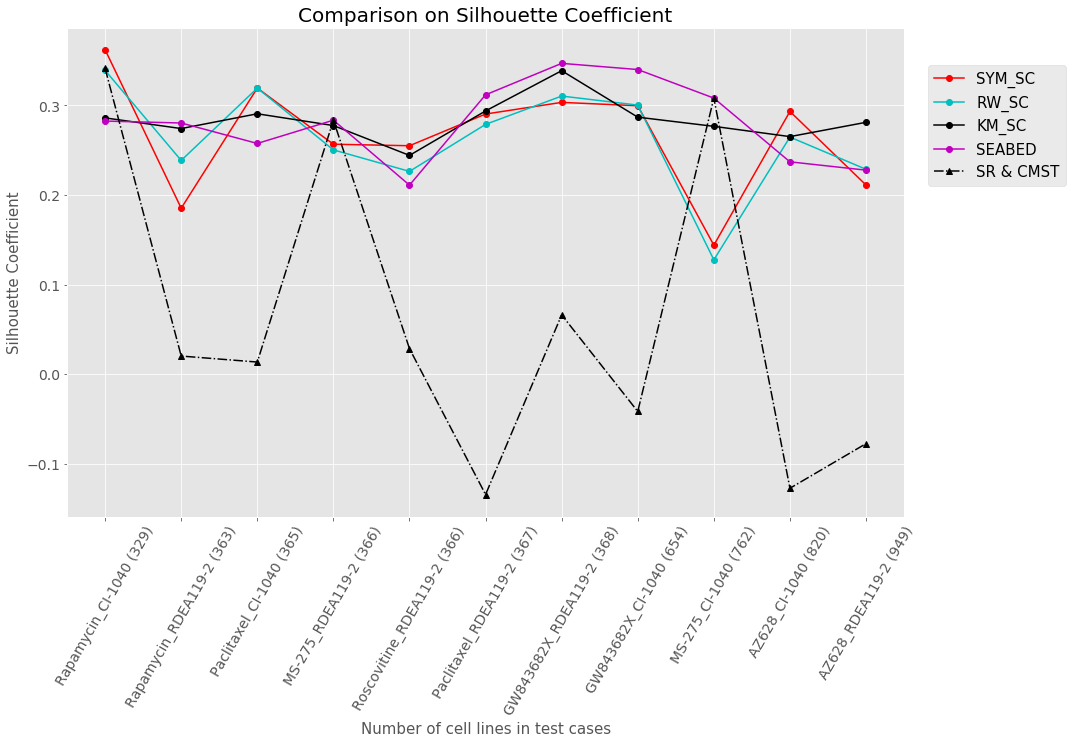

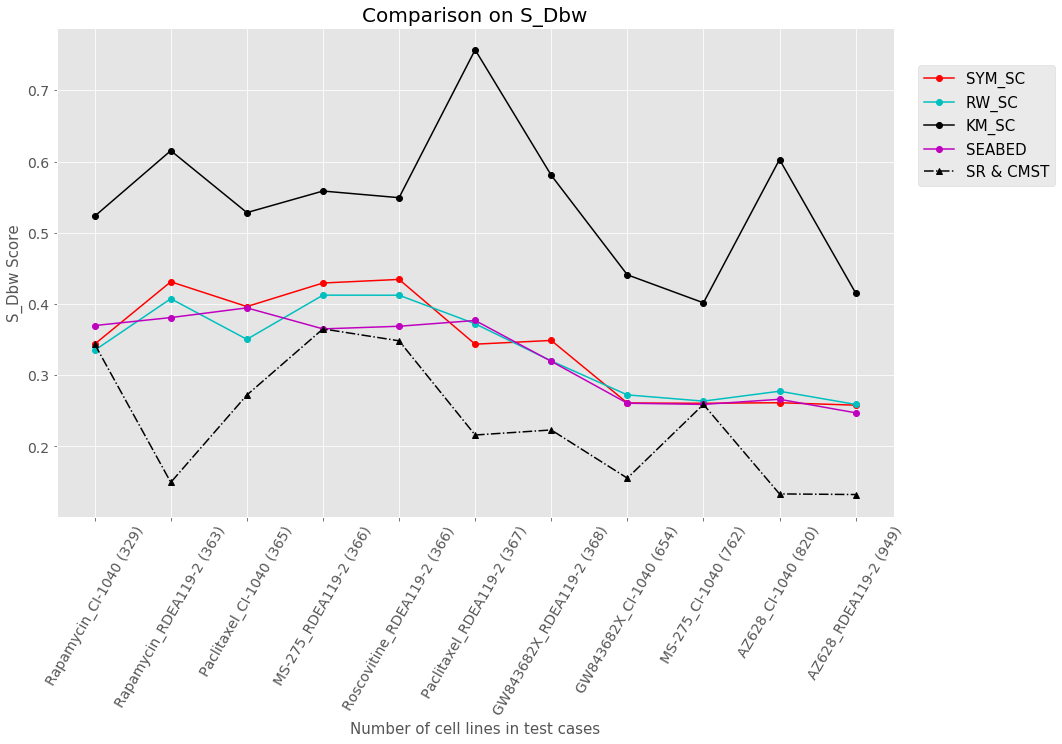

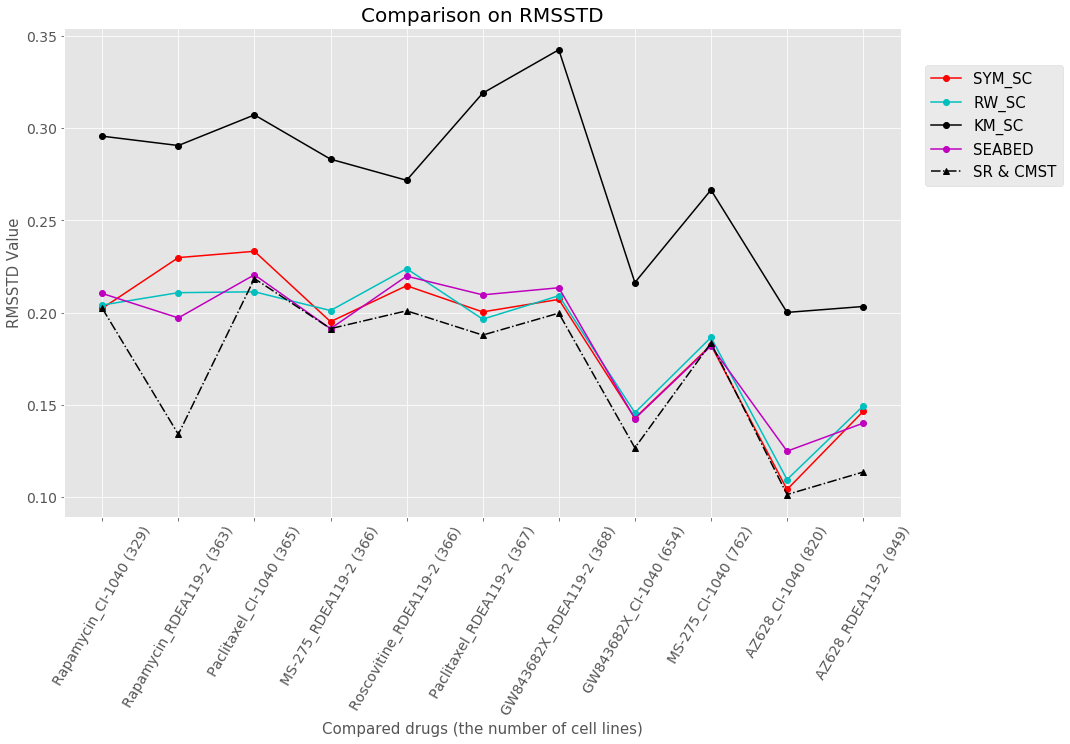

In [61]:
draw(kmbDict, symDict, rwbDict, somDict, unmzDict, esScore_dict, 'y')

<h1>SRD<h1>

In [39]:
# Sum of Ranks Cluster Ensemble Selction
def sum_qua_ces_Diveristy(ii, curTarg, allData, allLabel, allSC, allPBM, allSDBW, allRMSSTD):
    valdIds = ['silhouette', 'sdbw','rmsstd'] # 跑srd不要pbm
    numBaseClusters = len(allLabel[0]) #多少个base cluster
    
#     print('numBaseClusters:', numBaseClusters)
    
        
#     for ii, curTarg in enumerate(targList): 
#         if ii == 5:
    countDict = {} #记录sum
    fileName = '_'.join(curTarg)
    for pp in range(numBaseClusters): # 初始化计数dict
        countDict[pp] = 0 

    for jj,ee in enumerate(valdIds):

        indexBaseClusters = list(range(numBaseClusters)) # list记录base cluster编号

        if ee == 'sdbw':
            temp_scoreList = allSDBW[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sSDB = sorted(temp_scoreList, key=lambda x : x[1])
            for kk, ss in enumerate(sSDB):
                countDict[ss[0]] += kk # index 赋值给 对应的base cluster 编号 ss[0]cluster序号
        if ee == 'rmsstd':
            temp_scoreList = allRMSSTD[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sRMSSTD = sorted(temp_scoreList, key=lambda x : x[1])
            for kk, ss in enumerate(sRMSSTD):
                countDict[ss[0]] += kk
        if ee == 'pbm':
            temp_scoreList = allPBM[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sPBM = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
            for kk, ss in enumerate(sPBM):
                countDict[ss[0]] += kk            
                if ee == 'dunn':
                    temp_scoreList = allDunn[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
                    sDunn = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
                    for kk, ss in enumerate(sDunn):
                        countDict[ss[0]] += kk

        if ee == 'silhouette':
            temp_scoreList = allSC[ii] # 取出当前target的所有base cluster的sdbw score, (cluster序号, score)
            sSC = sorted(temp_scoreList, key=lambda x : x[1], reverse=True)
            for kk, ss in enumerate(sSC):
                countDict[ss[0]] += kk

    return countDict

#     sortedDict =  sorted(countDict.items(), key=lambda d: d[1])

    
#     import math

#     maxCluster = int(len(sortedDict)/5)
#     getCommittee = sortedDict[0:maxCluster]


#     idsCom = [xx[0] for xx in getCommittee]


#     finalCommittee = list()
#     for xx in idsCom:
#         finalCommittee.append(esLabelList[ii][xx])
            
#     return finalCommittee

        
        

In [40]:
def sum_qua_div(ii, esLabelList, quaDict):
    from sklearn.metrics import adjusted_rand_score as adRand
    from sklearn.metrics import normalized_mutual_info_score as nmi
    from itertools import permutations
    

    
    curLabelList = esLabelList[ii]
    tempList = list(range(len(curLabelList)))
    combIds = list(permutations(tempList, 2))
    divDict = {}
    
    for pp in range(len(curLabelList)): # 初始化计数dict
        divDict[pp] = 0 
    
#     print(len(combIds))
    for xx in combIds:
        divDict[xx[0]] += nmi(curLabelList[xx[0]],curLabelList[xx[1]]) # diversity dict
        
#     print(divDict)
    for kk, vv in divDict.items():
        divDict[kk] = 1-vv/(len(divDict))-1
        
    comb_sr_dict = {}
    
    for kk, vv in divDict.items():
        comb_sr_dict[kk] = (1-vv)*quaDict[kk]
    
    return comb_sr_dict
#     print(comb_sr_dict)
#     print()
#     print(divDict)
        
    
    
    
#     print(len(combIds))
    
    
    


In [41]:
def srdiv_mst_ensemble(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, cutoff_d):
    
    ensembleLabelDict= {}
    ensembleScoreDict = {}
    for ii,tt in enumerate(allTargList):
#         print(ii, tt)
        
        curSensValList = esDataList[ii][0]
        numSamples = len(curSensValList)
#         print(numSamples)
#         print(curSensValList)
        fileName = '_'.join(tt)
#         print(fileName)
        quaDict = sum_qua_ces_Diveristy(ii, tt, esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List)
        print('# Base Solutions:', len(quaDict))

        qua_div_dict = sum_qua_div(ii, esLabelList, quaDict)

        ##########Select Top Committee##############3
        sortedDict =  sorted(qua_div_dict.items(), key=lambda d: d[1])

        import math

        maxCluster = int(len(sortedDict)/5)
        getCommittee = sortedDict[0:maxCluster]
#         print('getCommittee', getCommittee)
        
    

        idsCom = [xx[0] for xx in getCommittee]

        finalCommittee = list()
        for xx in idsCom:
            finalCommittee.append(esLabelList[ii][xx])

        #############################################
        coassMat = get_coassMatrix(finalCommittee, fileName, numSamples)
        ############ Try spectral clustering ###############
        
        
#         optimalK = np.unique(esLabelList[ii][getCommittee[0][0]]).shape[0]
#         sc_model = SpectralClustering(n_clusters=optimalK, n_init=30, affinity='precomputed')
#         ensembelLabel = sc_model.fit_predict(coassMat)
        ########################

        ensembelLabel = performMST(coassMat, cutoff_d)
#         sizeList = Counter(ensembelLabel)
        sizeList = list(Counter(ensembelLabel).values())
        print('Max='+str(max(sizeList))+', Median='+str(np.median(sizeList))+', Min='+str(min(sizeList)))

        

        print('# Clusters:', np.unique(ensembelLabel).shape)
        
        ensembleLabelDict[fileName] = ensembelLabel

        f0 = open(fileName + '_adjMatrix', 'rb')
        oriAdjMat = pickle.load(f0)
        f0.close()

        enSilScore = silhouette_score((1.0-oriAdjMat), ensembelLabel, metric='precomputed')
        enSdbw = S_Dbw(curSensValList, ensembelLabel)
        enRMSSTD = tools.computeRMSSTD(curSensValList, ensembelLabel)

        ensembleScoreDict[fileName] = [enSilScore, enSdbw, enRMSSTD]
#     return
    return ensembleScoreDict, ensembleLabelDict

In [42]:
qua_div_score_dict, qua_div_label_dict = srdiv_mst_ensemble(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, 1.5)
global srd_score_dict
srd_score_dict = qua_div_score_dict

# Base Solutions: 16
Max=33, Median=23.0, Min=17
# Clusters: (14,)
# Base Solutions: 16
Max=18, Median=6.0, Min=1
# Clusters: (54,)
# Base Solutions: 16
Max=32, Median=24.0, Min=17
# Clusters: (15,)
# Base Solutions: 16
Max=21, Median=5.0, Min=1
# Clusters: (60,)
# Base Solutions: 16
Max=30, Median=15.0, Min=1
# Clusters: (29,)
# Base Solutions: 16
Max=30, Median=4.0, Min=1
# Clusters: (39,)
# Base Solutions: 16
Max=26, Median=3.0, Min=1
# Clusters: (40,)
# Base Solutions: 16
Max=21, Median=3.0, Min=1
# Clusters: (120,)
# Base Solutions: 16
Max=24, Median=5.0, Min=1
# Clusters: (133,)
# Base Solutions: 16
Max=34, Median=23.0, Min=16
# Clusters: (34,)
# Base Solutions: 16
Max=24, Median=5.0, Min=1
# Clusters: (138,)


In [58]:
def drawSRD(kmbDict, symDict, rwbDict, somDict, unmzDict, esDict, save):
        
        # numKMB_It KMB运行次数
        spRun = len(minSZ) # spectral clustering运行次数
        print(spRun)
        
        plt.style.use('ggplot')
#         f1 = plt.figure('Figure1',figsize = (6,4)).add_subplot(111) # silhouette
#         f2 = plt.figure('Figure2',figsize = (6,4)).add_subplot(111) # sdbw
#         f3 = plt.figure('Figure3',figsize = (6,4)).add_subplot(111) # rmsstd
        
#         params = {'legend.fontsize': 20,
      
#     'ysticks.fontsize':14,
#     'ylabel.fontsize':15,
#          'xticks.rotation':45,
#          'xticks.fontsize':14
#          }
        
#         plt.rcParams.update(params)
        # Silhouette Score
        
        xLen = list()
        for ii in range(len(targNameList)):
            xLen.append('#'+str(ii+1))

        
        sym_sil_max = list()
        rw_sil_max = list()
        unmz_sil_max = list()
        kmb_sil_max = list()
        som_sil_max = list()
        for fileName in targNameList:
        
            # 取出nmz第一组参数

            sym_sil = list()
            rw_sil = list()
            unmz_sil = list()
            kmb_sil = list()
            som_sil = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
#                 print(len(sym_temp_dict),len(rwb_temp_dict), len(unmz_temp_dict))
                sym_sil.append(list(sym_temp_dict.values())[0][0])
                
                rw_sil.append(list(rwb_temp_dict.values())[0][0])
                
                unmz_sil.append(list(unmz_temp_dict.values())[0][0])
                
            sym_sil_max.append(max(sym_sil))
            rw_sil_max.append(max(rw_sil))
            unmz_sil_max.append(max(unmz_sil))
            
            
            for jj in range(numKMB_It):

                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}

                kmb_sil.append(list(kmb_temp_dict.values())[0][0])
            kmb_sil_max.append(min(kmb_sil))

            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
# #   
#                 som_sil.append(list(som_temp_dict.values())[0][0])
#             som_sil_max.append(min(som_sil))
        
        plt.figure(1,figsize=(15,9))
        plt.title('Comparison on Silhouette Coefficient', fontsize=20)
        plt.plot(xLen, sym_sil_max,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sil_max,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sil_max,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sil_max,'mo-', label='SEABED')
#         plt.plot(xLen, som_sil_max, 'yo-', label='SOM')
        
                
        es_sil = list()
        sr_sil = list()
        for fileName in targNameList:
#             print(esDict.get(fileName))
            sr_sil.append(sr_score_dict.get(fileName)[0])
            es_sil.append(esDict.get(fileName)[0])
            
        plt.plot(xLen, sr_sil, 'k^-.', label='SR & CMST')
        plt.plot(xLen, es_sil, 'r^-.', label='SRD & CMST')
        plt.ylabel('Silhouette Coefficient', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'y':
            plt.savefig('silhouetteSRD_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        
        
        # SDB_W

        
        sym_sdbw_min = list()
        rw_sdbw_min = list()
        unmz_sdbw_min = list()
        kmb_sdbw_min = list()
        som_sdbw_min = list()
        for fileName in targNameList:
            sym_sdbw = list()
            rw_sdbw = list()
            unmz_sdbw = list()
            
            kmb_sdbw = list()
            som_sdbw = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                
                sym_sdbw.append(list(sym_temp_dict.values())[0][1])
                
                rw_sdbw.append(list(rwb_temp_dict.values())[0][1])
                
                unmz_sdbw.append(list(unmz_temp_dict.values())[0][1])
                
            sym_sdbw_min.append(min(sym_sdbw))
            rw_sdbw_min.append(min(rw_sdbw))
            unmz_sdbw_min.append(min(unmz_sdbw))
            
            for jj in range(numKMB_It):
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_sdbw.append(list(kmb_temp_dict.values())[0][1])
            kmb_sdbw_min.append(min(kmb_sdbw))
            
            
            #SOM
#             for jj in range(somRun):     
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
#                 som_sdbw.append(list(som_temp_dict.values())[0][1])
#             som_sdbw_min.append(min(som_sdbw))
        
        plt.figure(2,figsize=(15,9))
        plt.title('Comparison on S_Dbw', fontsize=20)
        plt.plot(xLen, sym_sdbw_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sdbw_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sdbw_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sdbw_min,'mo-', label='SEABED')
#         plt.plot(xLen, som_sdbw_min, 'yo-', label='SOM')
#         for fileName in tar
        
                
        es_sdbw = list()
        srb_sdbw = list()
        for fileName in targNameList:
            es_sdbw.append(esDict.get(fileName)[1])  
            srb_sdbw.append(sr_score_dict.get(fileName)[1])
        
        plt.plot(xLen, srb_sdbw,'k^-.',label='SR & CMST')
        plt.plot(xLen, es_sdbw, 'r^-.', label='SRD & CMST')
        
        
        plt.ylabel('S_Dbw Score', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'y':
            plt.savefig('sdbwSRD_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        
        
        # RMSSTD
        sym_rst_min = list()
        rw_rst_min = list()
        unmz_rst_min = list()
        kmb_rst_min = list()
        som_rst_min = list()
        
        for fileName in targNameList:
            sym_rst = list()
            rw_rst = list()
            unmz_rst = list()
            kmb_rst = list()
            som_rst = list()

            sym_rst_sum = 0
            rw_rst_sum = 0
            unmz_rst_sum = 0
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                sym_rst.append(list(sym_temp_dict.values())[0][2])
                
                rw_rst.append(list(rwb_temp_dict.values())[0][2])
                
                unmz_rst.append(list(unmz_temp_dict.values())[0][2])
            sym_rst_min.append(min(sym_rst))
            rw_rst_min.append(min(rw_rst))
            unmz_rst_min.append(min(unmz_rst))
            
            #KMB
            for jj in range(numKMB_It):
                
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_rst.append(list(kmb_temp_dict.values())[0][2])
            kmb_rst_min.append(min(kmb_rst))
            
            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)} 
#                 som_rst.append(list(som_temp_dict.values())[0][2])
#             som_rst_min.append(min(som_rst))
        

    
        plt.figure(3,figsize=(15,9))
        plt.title('Comparison on RMSSTD', fontsize=20)
        plt.plot(xLen, sym_rst_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_rst_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_rst_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_rst_min,'mo-', label='SEABED')
#         plt.plot(xLen, som_rst_min, 'yo-', label='SOM')
        
        plt.ylabel('RMSSTD Value', fontsize=15)
        plt.yticks(fontsize=14)

        srb_rmsstd = list()
        es_rst = list()
        
        for fileName in targNameList:
#             print(esDict.get(fileName))
            srb_rmsstd.append(sr_score_dict.get(fileName)[2])  
            es_rst.append(esDict.get(fileName)[2])

        plt.plot(xLen, srb_rmsstd,'k^-.', label='SR & CMST')
        plt.plot(xLen, es_rst, 'r^-.', label='SRD & CMST')
        plt.legend(fontsize=13, prop={'size':15},bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'y':
            plt.savefig('rmsstdSRD_'+str(numSampelsData)+'.pdf', dpi=500,  bbox_inches = 'tight')
        

4


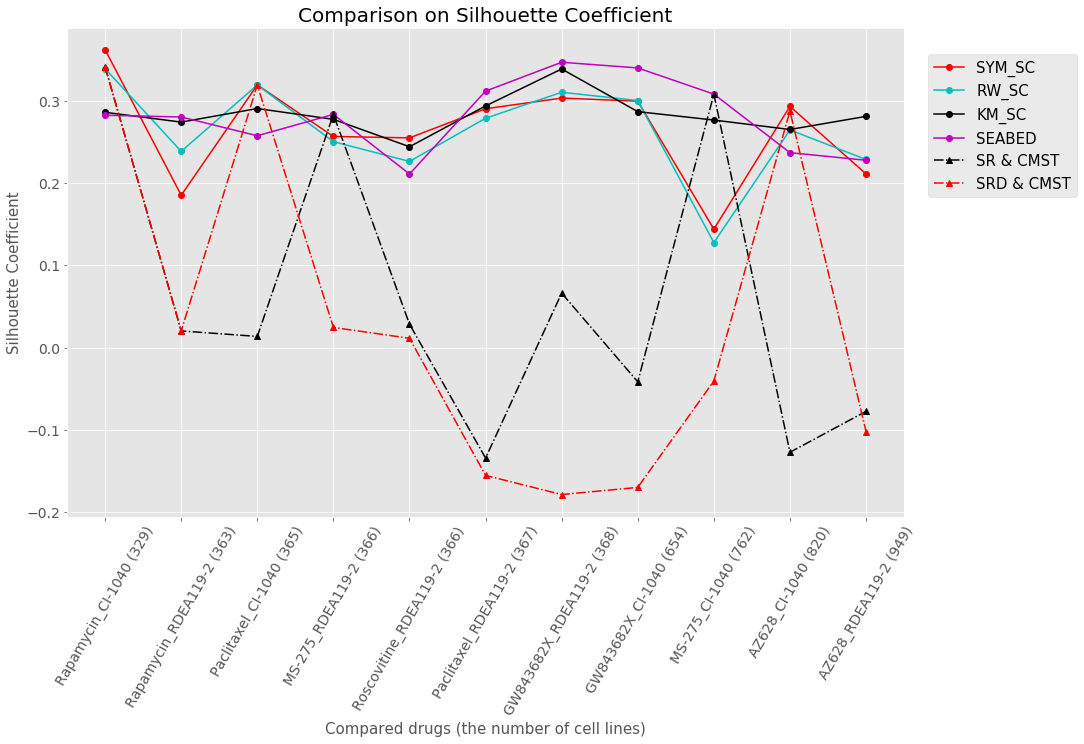

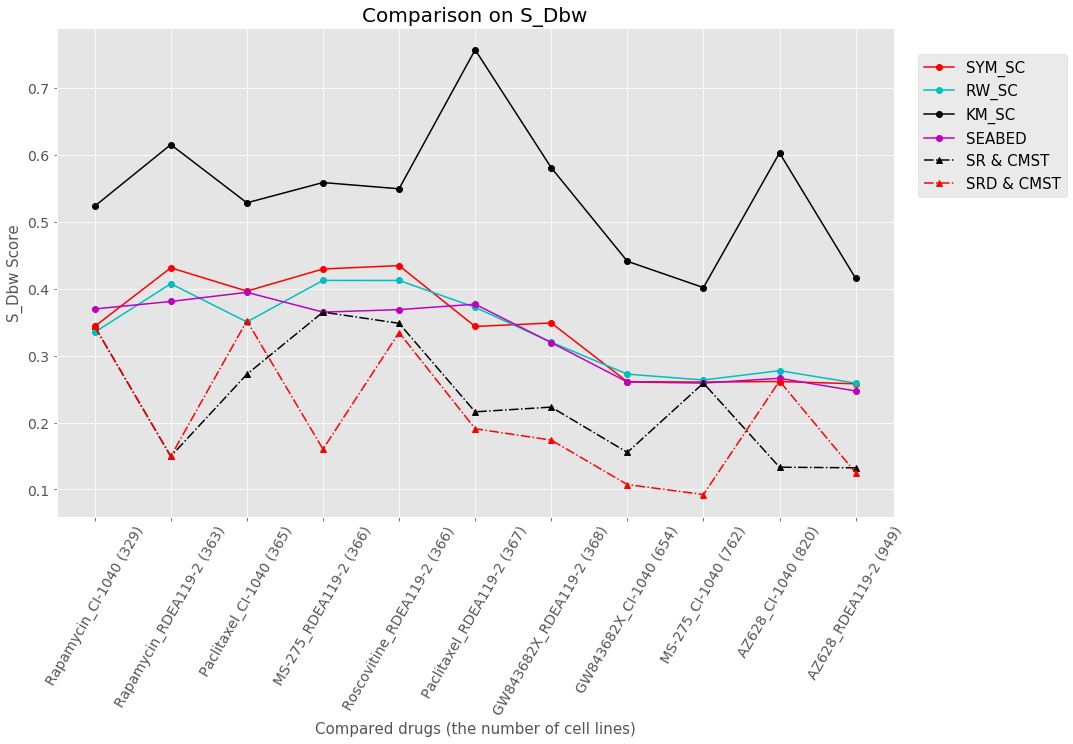

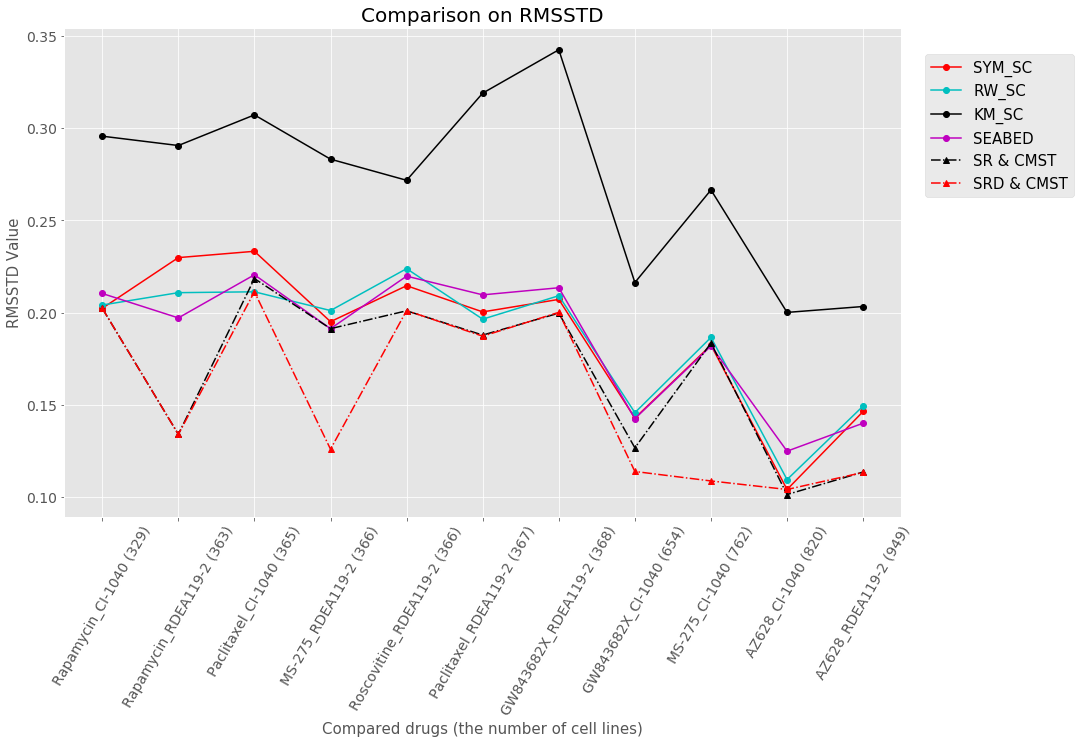

In [59]:
drawSRD(kmbDict, symDict, rwbDict, somDict, unmzDict, qua_div_score_dict, 'y')

Graph based Consensus

In [45]:
# def graphBasedConsensus(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, K):
#     ensembleLabelDict= {}
#     ensembleScoreDict = {}
#     for ii,tt in enumerate(allTargList):
# #         if ii == 0:
#         curSensValList = esDataList[ii][0]
#         numSamples = len(curSensValList)

#         fileName = '_'.join(tt)

#         quaDict = sum_qua_ces_Diveristy(ii, tt, esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List)
#         print('# Base Solutions:', len(quaDict))

#         qua_div_dict = sum_qua_div(ii, esLabelList, quaDict)

#         ##########Select Top Committee##############3
#         sortedDict =  sorted(qua_div_dict.items(), key=lambda d: d[1])

#         import math

#         maxCluster = int(len(sortedDict)/5)
#         getCommittee = sortedDict[0:6]

#         idsCom = [xx[0] for xx in getCommittee]

#         finalCommittee = list()
#         for xx in idsCom:
# #                 print(np.unique(esLabelList[ii][xx]))
#             finalCommittee.append(esLabelList[ii][xx])
    
#         finalCommittee = esLabelList[ii]

#         ###############################################

#         numEnsCom = len(finalCommittee)
#         aList = list()
# #             print(numEnsCom)

#         for ii, xx in enumerate(finalCommittee):
#             curLabelArray = xx
#             for numC in np.unique(curLabelArray):
#                 tempBin = list()
#                 for ii in curLabelArray:
#                     if numC == ii:
#                         tempBin.append(1)
#                     else:
#                         tempBin.append(0)
#                 aList.append(tempBin)
#         sam_cluster_matrix = np.array(aList).T

#         sam_sam_matrix = np.zeros((numSamples,numSamples))
#         clu_clu_matrix = np.zeros((len(aList),len(aList)))

# #             print(sam_sam_matrix.shape)
# #             print(sam_cluster_matrix.shape)
#         upperMatrix = np.hstack((sam_sam_matrix, sam_cluster_matrix))
# #             print(upperMatrix.shape)

#         lowerMatrix = np.hstack((sam_cluster_matrix.T, clu_clu_matrix))
# #             print(lowerMatrix.shape)

#         adjMatrix = np.vstack((upperMatrix, lowerMatrix)).astype(int)
# #             print(adjMatrix.shape)
#         print(adjMatrix.shape)

# #         from sklearn.cluster import SpectralClustering
# #         sc_model = SpectralClustering(n_clusters=K, affinity='precomputed')
# #         ensembleLabel = sc_model.fit_predict(graphMatrix)

#         tuple_list = list()
#         for ii in range(adjMatrix.shape[0]):
#             for jj in range(adjMatrix.shape[0]):
#                 if ii!=jj:
#                     tuple_list.append((ii,jj,adjMatrix[ii][jj]))

#         import metis
#         import networkx as nx
#         G = nx.Graph()
#         G.add_weighted_edges_from(tuple_list)

#         result = metis.part_graph(adjMatrix.tolist(), nparts=2, recursive=True, niter = 20)

#         ensembleLabel = result[1]


#         ensembleLabelDict[fileName] = ensembleLabel[0:numSamples]

#         f0 = open('/home/henry/code/Ensemble_Clustering/' + fileName + '_adjMatrix', 'rb')
#         oriAdjMat = pickle.load(f0)
#         f0.close()

#         enSilScore = silhouette_score((1.0-oriAdjMat), ensembleLabel[0:numSamples], metric='precomputed')
#         enSdbw = S_Dbw(curSensValList, ensembleLabel[0:numSamples])
#         enRMSSTD = tools.computeRMSSTD(curSensValList, ensembleLabel[0:numSamples])
        
#         print(np.unique(ensembleLabel[0:numSamples]))

#         ensembleScoreDict[fileName] = [enSilScore, enSdbw, enRMSSTD]
        
#     return ensembleScoreDict, ensembleLabelDict

In [46]:
# # K_list = [15,20,,]
# gra_sc_scoreDict, gra_sc_labelDict = graphBasedConsensus(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList, 25)
# print(gra_sc_scoreDict)

In [47]:
# def sc_graphMatrix(graphMatrix, K):
#     from sklearn.cluster import SpectralClustering
#     sc_model = SpectralClustering(n_clusters=K, affinity='precomputed')
#     ensembleLabel = sc_model.fit_predict(graphMatrix)
#     print(Counter(ensembleLabel))

In [48]:
# sc_graphMatrix(graphMatrix, K=14)

In [49]:
# draw(kmbDict, symDict, rwbDict, somDict, unmzDict, gra_sc_scoreDict, 'n')

<h1>NMIPartition,Spectral clustering</h1>

In [50]:
def smni_ces(curCatClusList):
    # curCatClusList 包含n个list, 每个list是base solution的label list
    from sklearn.metrics import adjusted_mutual_info_score as nmi
#     from sklearn.metrics import adjusted_rand_score as nmi
    numClus = len(curCatClusList)
    if numClus == 1:
        temp_tuple = (-99, -99)
        return temp_tuple, curCatClusList[0]
    else:
        nmiDict = {}
        for ii in range(numClus):
            sum_nmi = 0
            for jj in range(numClus):
                sum_nmi += nmi(curCatClusList[ii], curCatClusList[jj])
            nmiDict[ii] = sum_nmi
        
        ######## sorted ######
        sor_nmiDict = sorted(nmiDict.items(), key=lambda item:item[1], reverse=True)
#         print(sor_nmiDict)
        ids = sor_nmiDict[0][0]
        topLabel = curCatClusList[ids]

        temp_tuple = (sor_nmiDict[0][1], np.unique(topLabel).shape[0])
        return temp_tuple, topLabel
                
            

In [51]:
def computeNMImatrix(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList):
    ensembleLabelDict= {}
    ensembleScoreDict = {}
    for ii,tt in enumerate(allTargList):
#         if ii == 0:
        curSensValList = esDataList[ii][0]
        numSamples = len(curSensValList)

        fileName = '_'.join(tt)

        curLabelList = esLabelList[ii]
        numClu = len(curLabelList)

        ########### counstruct nmi pairwise matrix ####################
        nmiMatrix = np.ones((len(curLabelList), len(curLabelList)))
        from sklearn.metrics import normalized_mutual_info_score as nmi
        for ii in range(numClu):
            for jj in range(ii+1, numClu):
                curNMI = nmi(curLabelList[ii], curLabelList[jj])
                nmiMatrix.itemset((ii, jj), curNMI)
                nmiMatrix.itemset((jj, ii), curNMI)

        ################### perform Spectral clustering on NMI matrix #############
        from sklearn.cluster import SpectralClustering
        sc_n_clusters = int(numClu/2)
        sc_model = SpectralClustering(n_clusters = sc_n_clusters, affinity='precomputed')
        scLabel = sc_model.fit_predict(nmiMatrix)


        uniqueLabel = np.unique(scLabel)
        catCluList = list()           
        for ii in range(sc_n_clusters):
            temp_list = [curLabelList[jj] for jj,xx in enumerate(scLabel) if xx == uniqueLabel[ii]]
            catCluList.append(temp_list)

        ############### select the label array of base solution with top SNMI ###############
        finalCommittee = list()
        numClustesList = list()
        for ii in range(sc_n_clusters):
            curCatClus = catCluList[ii]
            temp_tuple, label = smni_ces(curCatClus) # (nmi, # clusters)
            finalCommittee.append(label)
            numClustesList.append(temp_tuple)
            
        ############## select optimal K for spectral clustering ##################
        sorNumClustersList = sorted(numClustesList, key=lambda x : x[1], reverse=True)
        optimalK = sorNumClustersList[0][1]
        print('OPTIMAL K=', optimalK)
        ##########################################################################

        ###################  Graph Based similarity #####################
        numEnsCom = len(finalCommittee)
        aList = list()

        for ii, xx in enumerate(finalCommittee):
            curLabelArray = xx
            for numClu in np.unique(curLabelArray):
                tempBin = list()
                for ii in curLabelArray:
                    if numClu == ii:
                        tempBin.append(1)
                    else:
                        tempBin.append(0)
                aList.append(tempBin)

        sam_cluster_matrix = np.array(aList).T

        sam_sam_matrix = np.zeros((numSamples,numSamples))
        clu_clu_matrix = np.zeros((len(aList),len(aList)))

        upperMatrix = np.hstack((sam_sam_matrix, sam_cluster_matrix))

        lowerMatrix = np.hstack((sam_cluster_matrix.T, clu_clu_matrix))

        coassMat = np.vstack((upperMatrix, lowerMatrix)).astype(int)


        
        ######################## EAC co-association Matrix ##################
#         coassMat = get_coassMatrix(finalCommittee, fileName, numSamples)

        
        ##################### Perform Spectral Clustering #####################
        
        from sklearn.cluster import SpectralClustering
        sc_model = SpectralClustering(n_clusters=optimalK+3, affinity='precomputed', n_init=50)
        ensembleLabel = sc_model.fit_predict(coassMat)

        #######################  METIS (bad) ##################
#         tuple_list = list()
#         for ii in range(coassMat.shape[0]):
#             for jj in range(coassMat.shape[0]):
#                 if ii!=jj:
#                     tuple_list.append((ii,jj,coassMat[ii][jj]))

#         import metis
#         import networkx as nx
#         G = nx.Graph()
#         G.add_weighted_edges_from(tuple_list)

#         result = metis.part_graph(G, nparts=optimalK, recursive=False)

#         ensembleLabel = result[1]
        
        ################## MST #####################3
#         ensembleLabel = performMST (coassMat, 2)
    
    
    
        ################# Calculate Score ######################

        ############### Assess size of clusters ##########
        sizeList = list(Counter(ensembleLabel).values())
        print('Max='+str(max(sizeList))+', Median='+str(np.median(sizeList))+', Min='+str(min(sizeList)))
        ensembleLabelDict[fileName] = ensembleLabel

        f0 = open(fileName + '_adjMatrix', 'rb')
        oriAdjMat = pickle.load(f0)
        f0.close()
        #########################  graph based similarity matrix #######################
        enSilScore = silhouette_score((1.0-oriAdjMat), ensembleLabel[0:numSamples], metric='precomputed')
        enSdbw = S_Dbw(curSensValList, ensembleLabel[0:numSamples])
        enRMSSTD = tools.computeRMSSTD(curSensValList, ensembleLabel[0:numSamples])

        ########################### Normal ###########################
#         enSilScore = silhouette_score((1.0-oriAdjMat), ensembleLabel, metric='precomputed')
#         enSdbw = S_Dbw(curSensValList, ensembleLabel)
#         enRMSSTD = tools.computeRMSSTD(curSensValList, ensembleLabel)



        ensembleScoreDict[fileName] = [enSilScore, enSdbw, enRMSSTD]
        
    return ensembleScoreDict, ensembleLabelDict
            

In [52]:
# KList = [15, 15, 13, 13, 14, 14, 13, 14, 14, 15, 14]
nmiScoreDict, nmiLabelDict = computeNMImatrix(esDataList, esLabelList, SC_List, PBM_List, SDBW_List, RMSSTD_List, allTargList)

OPTIMAL K= 15
Max=35, Median=22.0, Min=11
OPTIMAL K= 14
Max=45, Median=24.0, Min=12
OPTIMAL K= 15
Max=38, Median=25.5, Min=14
OPTIMAL K= 16
Max=32, Median=24.0, Min=12
OPTIMAL K= 15
Max=36, Median=25.0, Min=11
OPTIMAL K= 16
Max=41, Median=23.0, Min=9
OPTIMAL K= 15
Max=36, Median=25.0, Min=15
OPTIMAL K= 29
Max=38, Median=25.0, Min=9
OPTIMAL K= 31
Max=38, Median=29.0, Min=10
OPTIMAL K= 34
Max=40, Median=28.0, Min=12
OPTIMAL K= 37
Max=39, Median=29.0, Min=6


In [56]:
def draw_eca_scbased(kmbDict, symDict, rwbDict, somDict, unmzDict, esDict, save):
        
        # numKMB_It KMB运行次数
        spRun = len(minSZ) # spectral clustering运行次数
        print(spRun)
        
        plt.style.use('ggplot')
#         f1 = plt.figure('Figure1',figsize = (6,4)).add_subplot(111) # silhouette
#         f2 = plt.figure('Figure2',figsize = (6,4)).add_subplot(111) # sdbw
#         f3 = plt.figure('Figure3',figsize = (6,4)).add_subplot(111) # rmsstd
        
#         params = {'legend.fontsize': 20,
      
#     'ysticks.fontsize':14,
#     'ylabel.fontsize':15,
#          'xticks.rotation':45,
#          'xticks.fontsize':14
#          }
        
#         plt.rcParams.update(params)
        # Silhouette Score
        
        xLen = list()
        for ii in range(len(targNameList)):
            xLen.append('#'+str(ii+1))

        
        sym_sil_max = list()
        rw_sil_max = list()
        unmz_sil_max = list()
        kmb_sil_max = list()
        som_sil_max = list()
        for fileName in targNameList:
        
            # 取出nmz第一组参数

            sym_sil = list()
            rw_sil = list()
            unmz_sil = list()
            kmb_sil = list()
            som_sil = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
#                 print(len(sym_temp_dict),len(rwb_temp_dict), len(unmz_temp_dict))
                sym_sil.append(list(sym_temp_dict.values())[0][0])
                
                rw_sil.append(list(rwb_temp_dict.values())[0][0])
                
                unmz_sil.append(list(unmz_temp_dict.values())[0][0])
                
            sym_sil_max.append(max(sym_sil))
            rw_sil_max.append(max(rw_sil))
            unmz_sil_max.append(max(unmz_sil))
            
            
            for jj in range(numKMB_It):

                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}

                kmb_sil.append(list(kmb_temp_dict.values())[0][0])
            kmb_sil_max.append(min(kmb_sil))

            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
# #   
#                 som_sil.append(list(som_temp_dict.values())[0][0])
#             som_sil_max.append(min(som_sil))
        
        plt.figure(1,figsize=(15,9))
        plt.title('Comparison on Silhouette Coefficient', fontsize=20)
        plt.plot(xLen, sym_sil_max,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sil_max,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sil_max,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sil_max,'mo-', label='SEABED')
#         plt.plot(xLen, som_sil_max, 'yo-', label='SOM')
        
                
        es_sil = list()
        sr_sil = list()
        srd_sil = list()
        for fileName in targNameList:
#             print(esDict.get(fileName))
            es_sil.append(esDict.get(fileName)[0])
            sr_sil.append(sr_score_dict.get(fileName)[0])
            srd_sil.append(srd_score_dict.get(fileName)[0])
            
#         plt.plot(xLen, es_sil, 'bx-', label='NMIP & HGSC')

        plt.plot(xLen, sr_sil, 'k^-.', label='SR & CMST')
        plt.plot(xLen,srd_sil, 'r^-.', label='SRD & CMST')     
        plt.plot(xLen, es_sil, 'b^-.', label='NMIP & HGSC')
        
        plt.ylabel('Silhouette Coefficient', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation = 60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'yHG':
            plt.savefig('silhouetteHG_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        elif save == 'yCSP':
            plt.savefig('silhouetteCSP_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
            
        
        
        # SDB_W

        
        sym_sdbw_min = list()
        rw_sdbw_min = list()
        unmz_sdbw_min = list()
        kmb_sdbw_min = list()
        som_sdbw_min = list()
        for fileName in targNameList:
            sym_sdbw = list()
            rw_sdbw = list()
            unmz_sdbw = list()
            
            kmb_sdbw = list()
            som_sdbw = list()
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                
                sym_sdbw.append(list(sym_temp_dict.values())[0][1])
                
                rw_sdbw.append(list(rwb_temp_dict.values())[0][1])
                
                unmz_sdbw.append(list(unmz_temp_dict.values())[0][1])
                
            sym_sdbw_min.append(min(sym_sdbw))
            rw_sdbw_min.append(min(rw_sdbw))
            unmz_sdbw_min.append(min(unmz_sdbw))
            
            for jj in range(numKMB_It):
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_sdbw.append(list(kmb_temp_dict.values())[0][1])
            kmb_sdbw_min.append(min(kmb_sdbw))
            
            
            #SOM
#             for jj in range(somRun):     
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)}
#                 som_sdbw.append(list(som_temp_dict.values())[0][1])
#             som_sdbw_min.append(min(som_sdbw))
        
        plt.figure(2,figsize=(15,9))
        plt.title('Comparison on S_Dbw', fontsize=20)
        plt.plot(xLen, sym_sdbw_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_sdbw_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_sdbw_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_sdbw_min,'mo-', label='SEABED')
#         plt.plot(xLen, som_sdbw_min, 'yo-', label='SOM')
                
        es_sdbw = list()
        sr_sdbw = list()
        srd_sdbw = list()
        for fileName in targNameList:
            es_sdbw.append(esDict.get(fileName)[1])
            sr_sdbw.append(sr_score_dict.get(fileName)[1])
            srd_sdbw.append(srd_score_dict.get(fileName)[1])
            
#         plt.plot(xLen, es_sdbw, 'bx-', label='NMIP & HGSC')
        
        
        plt.plot(xLen, sr_sdbw, 'k^-.', label='SR & CMST')
        plt.plot(xLen,srd_sdbw, 'r^-.', label='SRD & CMST')
        plt.plot(xLen, es_sdbw, 'b^-.', label='NMIP & HGSC')
        
        plt.ylabel('S_Dbw Score', fontsize=15)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation=60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'yHG':
            plt.savefig('sdbwHG_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        elif save == 'yCSP':
            plt.savefig('sdbwCSP_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
            
        
        
        # RMSSTD
        sym_rst_min = list()
        rw_rst_min = list()
        unmz_rst_min = list()
        kmb_rst_min = list()
        som_rst_min = list()
        
        for fileName in targNameList:
            sym_rst = list()
            rw_rst = list()
            unmz_rst = list()
            kmb_rst = list()
            som_rst = list()

            sym_rst_sum = 0
            rw_rst_sum = 0
            unmz_rst_sum = 0
            for ii in range(spRun):
             # 当前fileNmae  a_b
                sym_temp_dict = {kk: vv for kk,vv in symDict.items() if (fileName in kk) and ('SYMB_'+str(ii) in kk)}
                rwb_temp_dict = {kk: vv for kk,vv in rwbDict.items() if (fileName in kk) and ('RWB_'+str(ii) in kk)}
                unmz_temp_dict = {kk: vv for kk,vv in unmzDict.items() if (fileName in kk) and ('UNMZB_'+str(ii) in kk)}
                sym_rst.append(list(sym_temp_dict.values())[0][2])
                
                rw_rst.append(list(rwb_temp_dict.values())[0][2])
                
                unmz_rst.append(list(unmz_temp_dict.values())[0][2])
            sym_rst_min.append(min(sym_rst))
            rw_rst_min.append(min(rw_rst))
            unmz_rst_min.append(min(unmz_rst))
            
            #KMB
            for jj in range(numKMB_It):
                
                kmb_temp_dict = {kk: vv for kk,vv in kmbDict.items() if (fileName in kk) and ('KMB_'+str(jj) in kk)}
                kmb_rst.append(list(kmb_temp_dict.values())[0][2])
            kmb_rst_min.append(min(kmb_rst))
            
            #SOM
#             for jj in range(somRun):
                
#                 som_temp_dict = {kk: vv for kk,vv in somDict.items() if (fileName in kk) and ('SOM_'+str(jj) in kk)} 
#                 som_rst.append(list(som_temp_dict.values())[0][2])
#             som_rst_min.append(min(som_rst))
        

    
        plt.figure(3,figsize=(15,9))
        plt.title('Comparison on RMSSTD', fontsize=20)
        plt.plot(xLen, sym_rst_min,'ro-', label='SYM_SC')
        plt.plot(xLen, rw_rst_min,'co-', label='RW_SC')
        plt.plot(xLen, kmb_rst_min,'ko-', label='KM_SC')
        plt.plot(xLen, unmz_rst_min,'mo-', label='SEABED')
#         plt.plot(xLen, som_rst_min, 'yo-', label='SOM')
        
        plt.ylabel('RMSSTD Value', fontsize=15)
        plt.yticks(fontsize=14)

        es_rst = list()
        srd_rst = list()
        sr_rst = list()
        for fileName in targNameList:
#             print(esDict.get(fileName))
            es_rst.append(esDict.get(fileName)[2])
            srd_rst.append(srd_score_dict.get(fileName)[2])
            sr_rst.append(sr_score_dict.get(fileName)[2])

        plt.plot(xLen, sr_rst, 'k^-.', label='SR & CMST')
        plt.plot(xLen,srd_rst, 'r^-.', label='SRD & CMST')
        
        plt.plot(xLen, es_rst, 'b^-.', label='NMIP & HGSC')
        plt.legend(fontsize=13, prop={'size':15}, bbox_to_anchor=(1.02,0.8),loc='center left')
        plt.xticks(xLen, numCellLines, fontsize=14, rotation = 60)
        plt.xlabel('Compared drugs (the number of cell lines)', fontsize=15)
        if save == 'yHG':
            plt.savefig('rmsstdHG_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        elif save == 'yCSP':
            plt.savefig('rmsstdCSP_'+str(numSampelsData)+'.pdf', dpi=500, bbox_inches = 'tight')
        

4


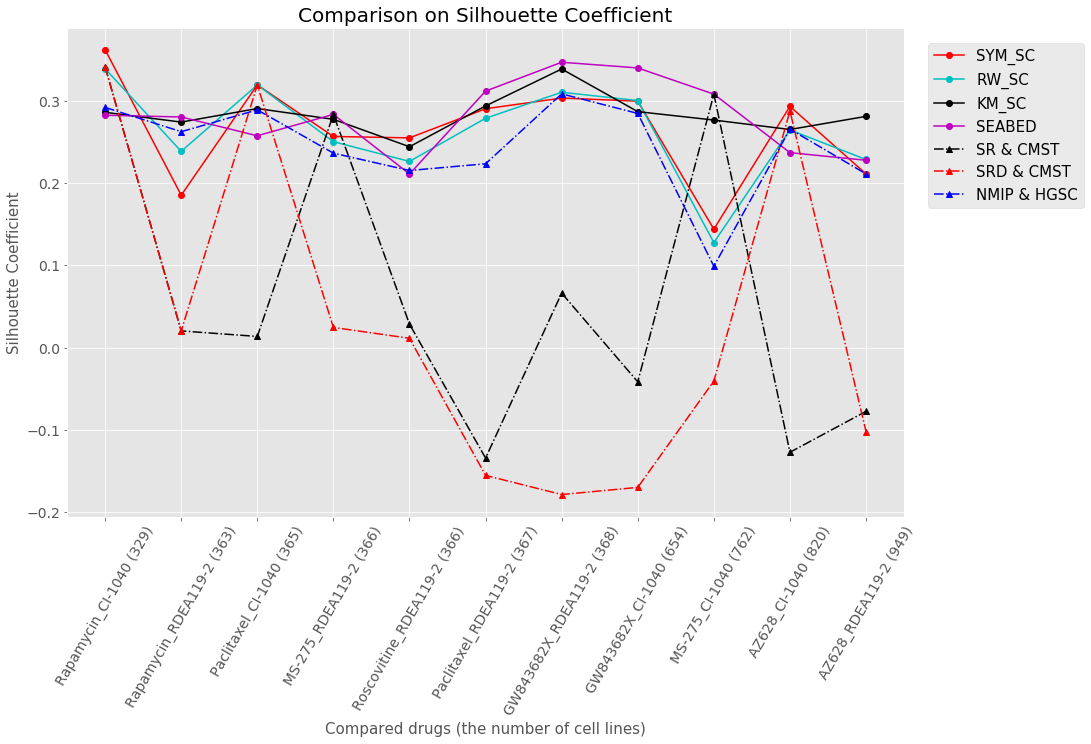

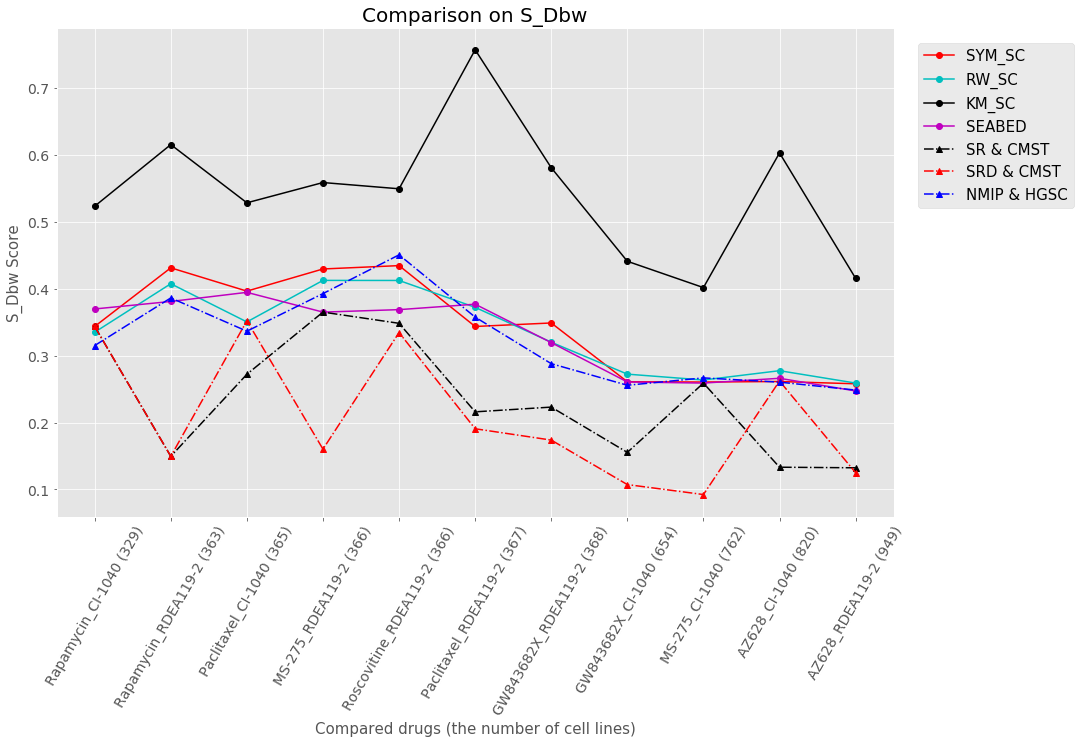

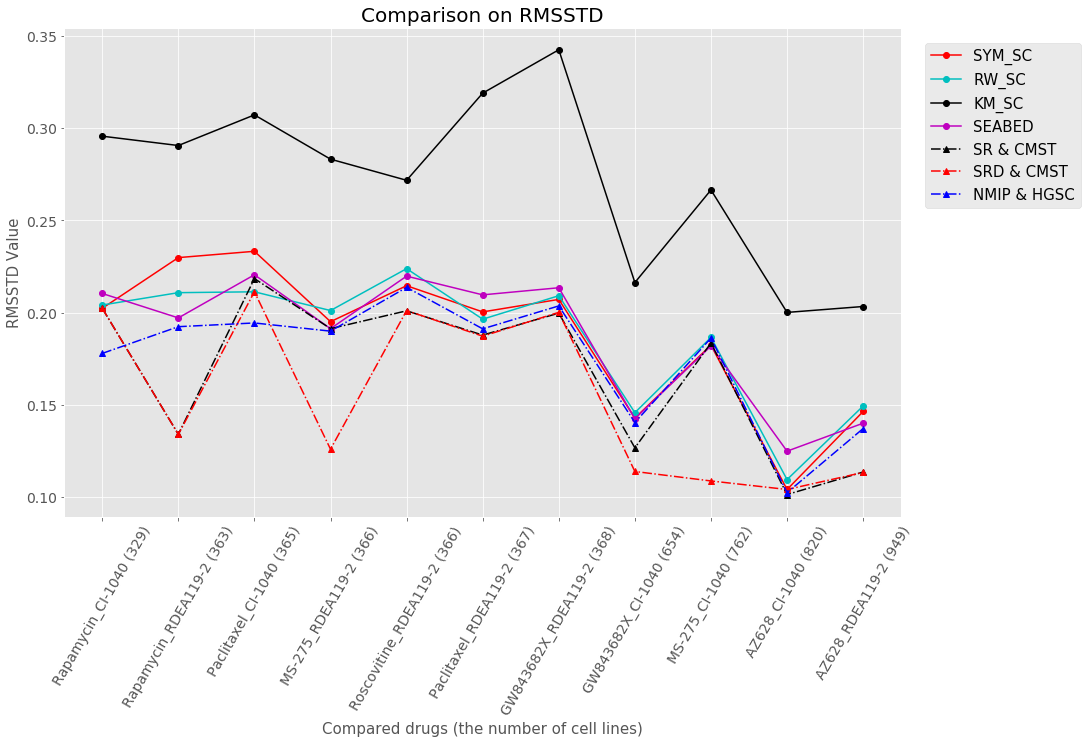

In [57]:
draw_eca_scbased(kmbDict, symDict, rwbDict, somDict, unmzDict, nmiScoreDict, 'yHG')